In [51]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('used_cars.csv')
df

,Year,Brand,Model,kms_droved,Fuel_type,vehicle_type,No.Of_Owners,Price
0,2020,KIA,SELTOS,"4,765",Petrol,Manual,1st Owner,NaN
1,2018,Hyundai,Grand,"5,505",Petrol,Manual,1st Owner,"₹5,30,000"
2,2021,KIA,SELTOS,"5,500",Petrol,Manual,1st Owner,NaN
3,2019,Maruti,Swift,"14,097",Petrol,Manual,1st Owner,"₹5,41,000"
4,2020,Maruti,Swift,"12,421",Petrol,Manual,1st Owner,"₹5,62,000"
...,...,...,...,...,...,...,...,...
4182,2020,Hyundai,Creta,"50,374",Petrol,Automatic,1st Owner,"₹17,75,000"
4183,2016,Hyundai,Creta,"55,748",Petrol,Automatic,2nd Owner,"₹10,81,000"
4184,2019,Maruti,Swift,"58,868",Diesel,Manual,1st Owner,"₹6,91,000"
4185,2012,Maruti,Alto,"68,415",Petrol,Manual,2nd Owner,"₹2,40,000"


In [3]:
df.dtypes

Year             int64
Brand           object
Model           object
kms_droved      object
Fuel_type       object
vehicle_type    object
No.Of_Owners    object
Price           object
dtype: object

In [4]:
df.columns

Index(['Year', 'Brand', 'Model', 'kms_droved', 'Fuel_type', 'vehicle_type',
       'No.Of_Owners', 'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Year               0
Brand              0
Model              0
kms_droved         0
Fuel_type          0
vehicle_type     243
No.Of_Owners       0
Price           1047
dtype: int64

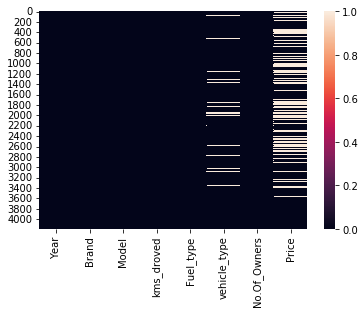

In [6]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

data is missing

In [7]:
#Exploring target data variable
df.Price.unique()

array([nan, '₹5,30,000', '₹5,41,000', '₹5,62,000', '₹5,52,000',
       '₹5,00,000', '₹4,90,000', '₹5,12,000', '₹6,62,000', '₹5,29,000',
       '₹6,46,000', '₹5,10,000', '₹6,37,000', '₹4,73,000', '₹7,12,000',
       '₹2,85,000', '₹2,62,000', '₹2,73,000', '₹5,15,000', '₹5,68,000',
       '₹2,77,000', '₹6,09,000', '₹2,96,000', '₹5,28,000', '₹2,28,000',
       '₹5,46,000', '₹3,38,000', '₹5,07,000', '₹3,10,000', '₹7,57,000',
       '₹7,19,000', '₹6,50,000', '₹2,72,000', '₹2,83,000', '₹6,86,000',
       '₹6,04,000', '₹5,45,000', '₹6,48,000', '₹3,51,000', '₹3,60,000',
       '₹2,95,000', '₹2,44,000', '₹5,42,000', '₹1,85,000', '₹3,02,000',
       '₹2,65,000', '₹3,03,000', '₹2,52,000', '₹5,50,000', '₹2,46,000',
       '₹2,90,000', '₹7,39,000', '₹7,81,000', '₹4,94,000', '₹3,33,000',
       '₹5,89,000', '₹3,45,000', '₹7,16,000', '₹3,30,000', '₹5,84,000',
       '₹3,23,000', '₹5,90,000', '₹5,24,000', '₹3,77,000', '₹5,14,000',
       '₹2,58,000', '₹2,19,000', '₹6,41,000', '₹2,21,000', '₹3,82,000',


column has continuous data

In [8]:
#filling the missing values in dataset

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['vehicle_type']=imp.fit_transform(df['vehicle_type'].values.reshape(-1,1))
df['Price']=imp.fit_transform(df['Price'].values.reshape(-1,1))

In [9]:
df.isnull().sum()

Year            0
Brand           0
Model           0
kms_droved      0
Fuel_type       0
vehicle_type    0
No.Of_Owners    0
Price           0
dtype: int64

no missing data

In [10]:
#Taking the categorical data 
categorical=[x for x in df.columns if df[x].dtype==object]

Maruti        1801
Hyundai       1052
Honda          362
Renault        184
Tata           181
Ford           107
Mahindra        98
Toyota          91
KIA             79
Volkswagen      69
Skoda           42
Datsun          38
MG              32
Nissan          19
Jeep            13
MARUTI           6
Audi             4
Mercedes         3
BMW              2
Jaguar           2
SKODA            1
Fiat             1
Name: Brand, dtype: int64


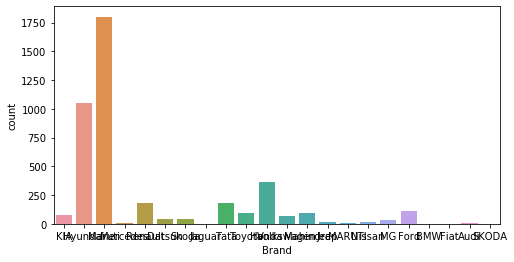

Alto       324
Swift      274
Baleno     233
Grand      215
Elite      180
          ... 
ALCAZAR      1
Camry        1
CARENS       1
TIAGO        1
Q3           1
Name: Model, Length: 108, dtype: int64


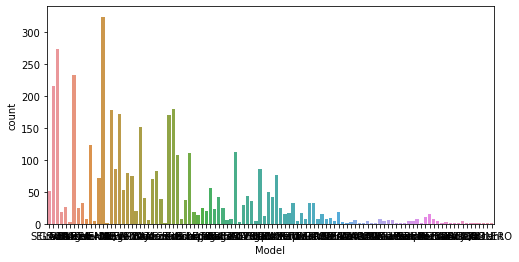

26,130    4
26,959    4
9,585     4
67        4
74        4
         ..
77,063    1
27,954    1
57,534    1
39,507    1
87,411    1
Name: kms_droved, Length: 3248, dtype: int64


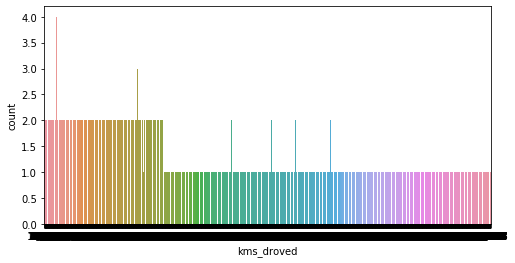

Petrol          3296
Diesel           557
Petrol + CNG     334
Name: Fuel_type, dtype: int64


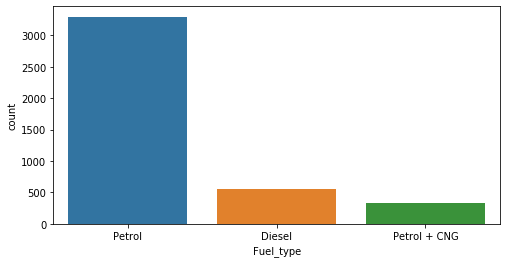

Manual       3478
Automatic     709
Name: vehicle_type, dtype: int64


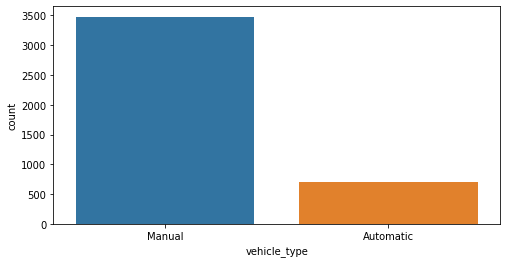

1st Owner    3268
2nd Owner     882
3rd Owner      37
Name: No.Of_Owners, dtype: int64


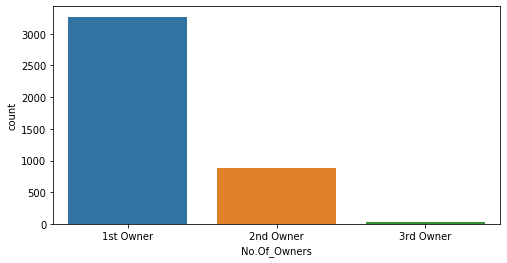

₹4,92,000     1074
₹5,56,000       24
₹5,69,000       18
₹4,79,000       17
₹4,96,000       15
              ... 
₹2,75,000        1
₹10,00,000       1
₹12,11,000       1
₹5,81,508        1
₹8,52,000        1
Name: Price, Length: 759, dtype: int64


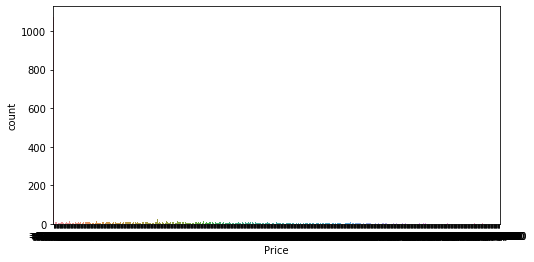

In [11]:
#Plotting countplot for each categorical data
for i in categorical:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=df[i])
    print(df[i].value_counts())
    plt.show()

In [12]:
#Taking all continuous data
continuous=[x for x in df.columns if x not in categorical]

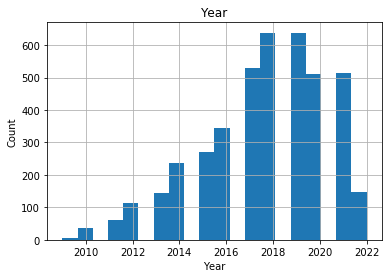

In [13]:
for i in continuous:
    data=df.copy()
    data[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

# Observations:

1. maximum cars to be selled are of year 2018 to 2020 of count almost 600 each.
2. 1st owner has the maximum count of 3268, then followed by 2nd owner count of 882 and 3rd owner count of 37.
3. maximum cars to be selled are manual with count of 3478 and rest all the 708 cars are automatic.
4. 3069 cars are petrol, 557 cars are diesel and rest 337 cars are petrol+cng.
5. maximum cars are of maruti, followed by hundai and least are SKODA and fiat.
6. alto, swift, baleno and grand models are maximum for selling.
7. Q, tiago, camry and carens models are very less for selling.

In [22]:
#coverting string into integer
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df

,Year,Brand,Model,kms_droved,Fuel_type,vehicle_type,No.Of_Owners,Price
0,2020,9,73,1549,1,1,0,383
1,2018,6,45,1978,1,1,0,424
2,2021,9,73,1977,1,1,0,383
3,2019,13,79,239,1,1,0,435
4,2020,13,79,146,1,1,0,456
...,...,...,...,...,...,...,...,...
4182,2020,6,30,2004,1,0,0,103
4183,2016,6,30,2181,1,0,1,33
4184,2019,13,79,2296,0,1,0,592
4185,2012,13,10,2587,1,1,1,125


In [24]:
#Statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,4187.0,2017.674707,2.712139,2009.0,2016.0,2018.0,2020.0,2022.0
Brand,4187.0,10.798424,4.607994,0.0,6.0,13.0,13.0,21.0
Model,4187.0,50.979460,29.750789,0.0,26.0,45.0,79.0,107.0
kms_droved,4187.0,1584.786004,934.964714,0.0,773.5,1558.0,2393.5,3247.0
Fuel_type,4187.0,0.946740,0.458274,0.0,1.0,1.0,1.0,2.0
vehicle_type,4187.0,0.830666,0.375091,0.0,1.0,1.0,1.0,1.0
No.Of_Owners,4187.0,0.228326,0.440356,0.0,0.0,0.0,0.0,2.0
Price,4187.0,393.754956,145.387990,0.0,317.0,383.0,479.0,758.0


1. count is same for all the columns
2. for some columns mean is greater than 50% and for some columns mean is lesser than 50%
3. for all the columns there is a difference between max and 75%

In [25]:
#correaltion of columns
df.corr()

,Year,Brand,Model,kms_droved,Fuel_type,vehicle_type,No.Of_Owners,Price
Year,1.000000,0.191599,-0.038702,-0.366576,0.046025,-0.088679,-0.240435,0.338391
Brand,0.191599,1.000000,0.086560,-0.082539,0.017879,-0.019477,-0.064786,-0.018384
Model,-0.038702,0.086560,1.000000,0.012090,-0.059356,-0.005921,0.039161,-0.065610
kms_droved,-0.366576,-0.082539,0.012090,1.000000,-0.118341,-0.014649,0.129097,-0.062525
Fuel_type,0.046025,0.017879,-0.059356,-0.118341,1.000000,0.111512,-0.051001,-0.001282
vehicle_type,-0.088679,-0.019477,-0.005921,-0.014649,0.111512,1.000000,-0.036327,-0.065003
No.Of_Owners,-0.240435,-0.064786,0.039161,0.129097,-0.051001,-0.036327,1.000000,-0.071604
Price,0.338391,-0.018384,-0.065610,-0.062525,-0.001282,-0.065003,-0.071604,1.000000


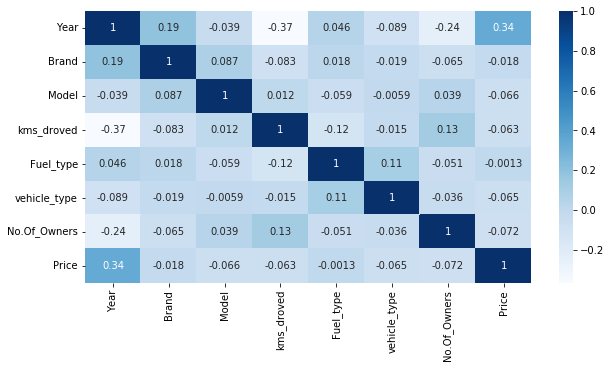

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

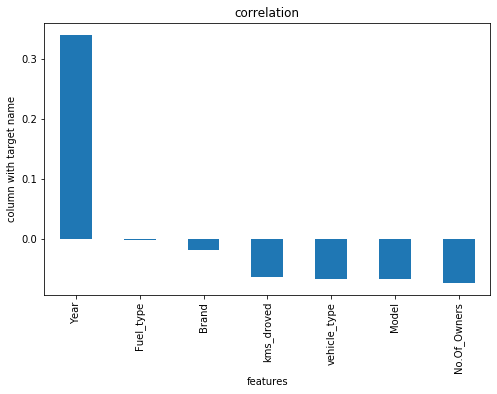

In [33]:
plt.figure(figsize=(8,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('column with target name')
plt.title('correlation')
plt.show()

1. year is highly positively correlated with target varibale.
2. fuel_type is least correlated with target variable.
3. model and no.of owners is highly negatively correlation with target variable.

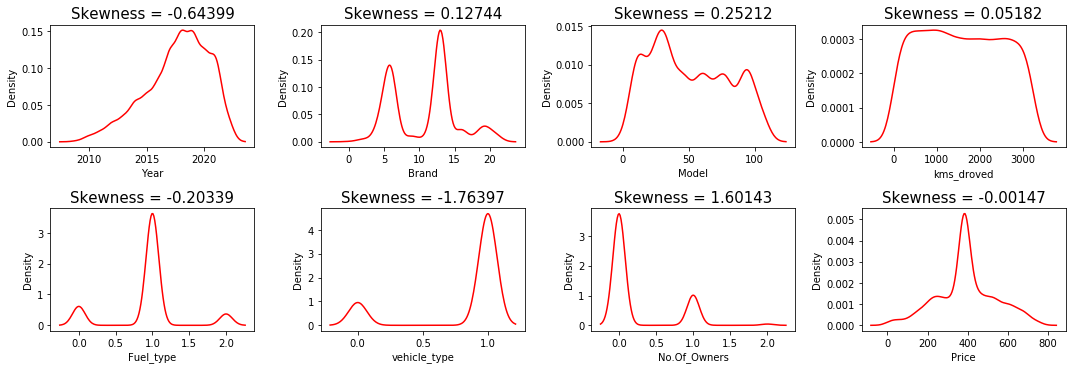

In [36]:
plt.figure(figsize=(15,15))
for i in range (0, len(df.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(df[df.columns[i]], color = "red")
    plt.title(f"Skewness = {round(df[df.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

skewness is present

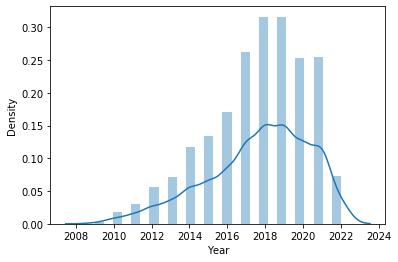

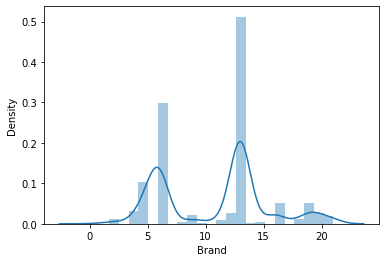

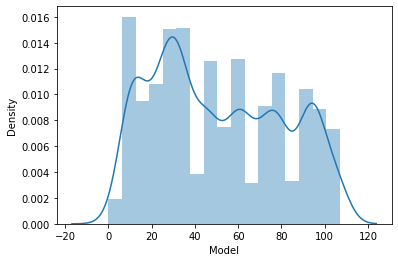

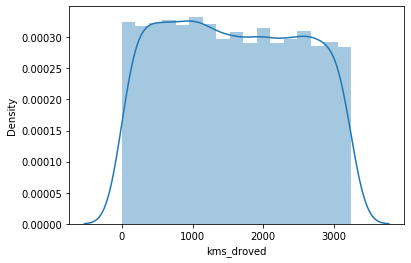

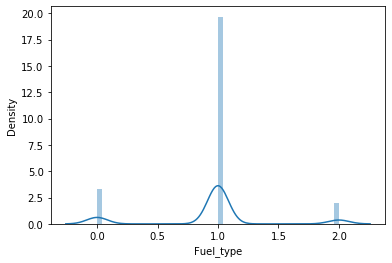

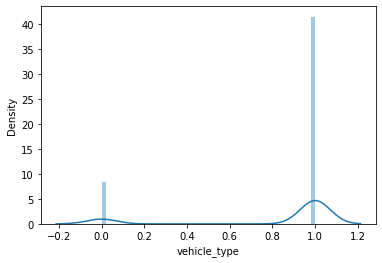

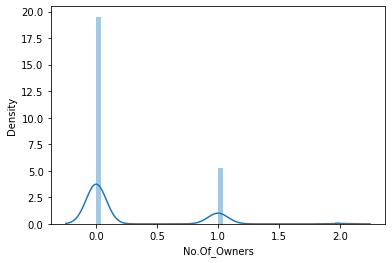

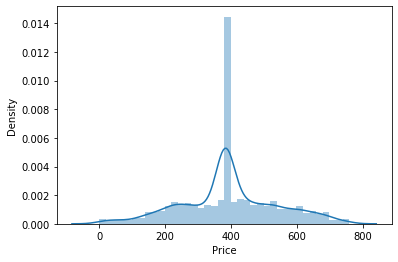

In [37]:
#checking the distribution of skewness
for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

data is not normally distributed

Year               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Brand           AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Model           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
kms_droved      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Fuel_type             AxesSubplot(0.125,0.125;0.168478x0.343182)
vehicle_type       AxesSubplot(0.327174,0.125;0.168478x0.343182)
No.Of_Owners       AxesSubplot(0.529348,0.125;0.168478x0.343182)
Price              AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

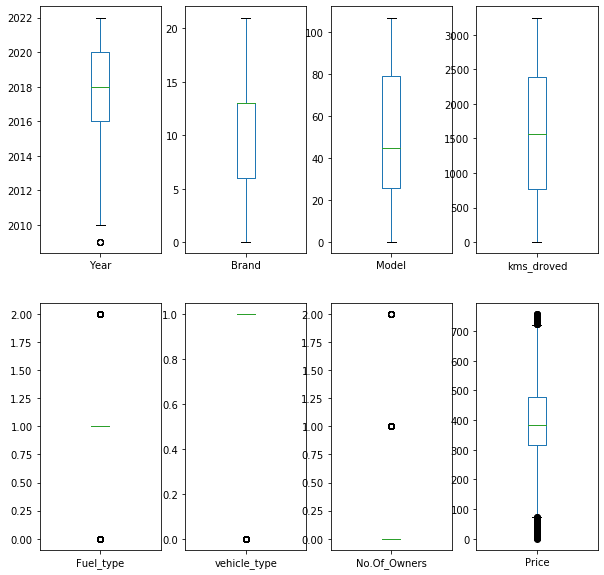

In [39]:
#checking outliers
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

outliers are present

In [40]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.85746723, 0.39033008, 0.74025498, ..., 0.4515006 , 0.51856492,
        0.073983  ],
       [0.11995382, 1.04145041, 0.20100893, ..., 0.4515006 , 0.51856492,
        0.20805471],
       [1.22622393, 0.39033008, 0.74025498, ..., 0.4515006 , 0.51856492,
        0.073983  ],
       ...,
       [0.48871052, 0.47783037, 0.94195438, ..., 0.4515006 , 0.51856492,
        1.36372146],
       [2.09258641, 0.47783037, 1.37758882, ..., 0.4515006 , 1.75259756,
        1.84875694],
       [0.11995382, 1.04145041, 0.20100893, ..., 2.2148365 , 0.51856492,
        0.62767181]])

In [41]:
threshold=3
print(np.where(z>3))

(array([  66,  209,  215,  410,  415,  620,  692,  955, 1087, 1185, 1423,
       1459, 1508, 1539, 1546, 1662, 1745, 1806, 2144, 2145, 2395, 2473,
       2607, 2688, 2756, 2927, 2987, 3138, 3460, 3468, 3494, 3614, 3627,
       3662, 3665, 3761, 3854, 3859, 3863, 3890, 4115, 4145, 4146],
      dtype=int64), array([0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 0, 6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6],
      dtype=int64))


In [42]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,Year,Brand,Model,kms_droved,Fuel_type,vehicle_type,No.Of_Owners,Price
0,2020,9,73,1549,1,1,0,383
1,2018,6,45,1978,1,1,0,424
2,2021,9,73,1977,1,1,0,383
3,2019,13,79,239,1,1,0,435
4,2020,13,79,146,1,1,0,456
...,...,...,...,...,...,...,...,...
4182,2020,6,30,2004,1,0,0,103
4183,2016,6,30,2181,1,0,1,33
4184,2019,13,79,2296,0,1,0,592
4185,2012,13,10,2587,1,1,1,125


almost 40 rows are dropped to clear the outliers

In [43]:
#separating columns into features and target
x=dfnew.drop('Price',axis=1)
y=dfnew['Price']

In [44]:
#removing skewness
import sklearn
from sklearn.preprocessing import power_transform

In [45]:
x=power_transform(x,method='yeo-johnson')

In [46]:
x

array([[ 0.85943698, -0.32318495,  0.79183441, ...,  0.08686946,
         0.45238387, -0.51886317],
       [ 0.07930458, -1.04141455, -0.04291413, ...,  0.08686946,
         0.45238387, -0.51886317],
       [ 1.26301436, -0.32318495,  0.79183441, ...,  0.08686946,
         0.45238387, -0.51886317],
       ...,
       [ 0.46493361,  0.52384064,  0.94920233, ..., -1.9719618 ,
         0.45238387, -0.51886317],
       [-2.0587602 ,  0.52384064, -1.61489883, ...,  0.08686946,
         0.45238387,  1.92729039],
       [ 0.07930458, -1.04141455, -0.04291413, ...,  0.08686946,
        -2.21051208, -0.51886317]])

In [47]:
x=pd.DataFrame(x)  #coverting numpy to panda

In [48]:
x

,0,1,2,3,4,5,6
0,0.859437,-0.323185,0.791834,0.081040,0.086869,0.452384,-0.518863
1,0.079305,-1.041415,-0.042914,0.495171,0.086869,0.452384,-0.518863
2,1.263014,-0.323185,0.791834,0.494242,0.086869,0.452384,-0.518863
3,0.464934,0.523841,0.949202,-1.572154,0.086869,0.452384,-0.518863
4,0.859437,0.523841,0.949202,-1.756671,0.086869,0.452384,-0.518863
...,...,...,...,...,...,...,...
4139,0.859437,-1.041415,-0.596895,0.519276,0.086869,-2.210512,-0.518863
4140,-0.666108,-1.041415,-0.596895,0.680769,0.086869,-2.210512,1.927290
4141,0.464934,0.523841,0.949202,0.783414,-1.971962,0.452384,-0.518863
4142,-2.058760,0.523841,-1.614899,1.035994,0.086869,0.452384,1.927290


In [49]:
y

0       383
1       424
2       383
3       435
4       456
       ... 
4182    103
4183     33
4184    592
4185    125
4186    485
Name: Price, Length: 4144, dtype: int32

In [53]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(x)

In [54]:
x

,0,1,2,3,4,5,6
0,0.859437,-0.323185,0.791834,0.081040,0.086869,0.452384,-0.518863
1,0.079305,-1.041415,-0.042914,0.495171,0.086869,0.452384,-0.518863
2,1.263014,-0.323185,0.791834,0.494242,0.086869,0.452384,-0.518863
3,0.464934,0.523841,0.949202,-1.572154,0.086869,0.452384,-0.518863
4,0.859437,0.523841,0.949202,-1.756671,0.086869,0.452384,-0.518863
...,...,...,...,...,...,...,...
4139,0.859437,-1.041415,-0.596895,0.519276,0.086869,-2.210512,-0.518863
4140,-0.666108,-1.041415,-0.596895,0.680769,0.086869,-2.210512,1.927290
4141,0.464934,0.523841,0.949202,0.783414,-1.971962,0.452384,-0.518863
4142,-2.058760,0.523841,-1.614899,1.035994,0.086869,0.452384,1.927290


In [56]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(y_test,pred_test)}")
          
    print("\n") 

At random state 0,the training accuracy is:- 0.12108092251562785
At random state 0,the training accuracy is:- 0.089742492556247


At random state 1,the training accuracy is:- 0.12108092251562785
At random state 1,the training accuracy is:- 0.089742492556247


At random state 2,the training accuracy is:- 0.12108092251562785
At random state 2,the training accuracy is:- 0.089742492556247


At random state 3,the training accuracy is:- 0.12108092251562785
At random state 3,the training accuracy is:- 0.089742492556247


At random state 4,the training accuracy is:- 0.12108092251562785
At random state 4,the training accuracy is:- 0.089742492556247


At random state 5,the training accuracy is:- 0.12108092251562785
At random state 5,the training accuracy is:- 0.089742492556247


At random state 6,the training accuracy is:- 0.12108092251562785
At random state 6,the training accuracy is:- 0.089742492556247


At random state 7,the training accuracy is:- 0.12108092251562785
At random state 7,the tra

In [57]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.20)

In [58]:
#finding the best model
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [59]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [60]:
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('*****',name,'*****')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

***** Linear Regression *****


LinearRegression()


r2_score:  0.09027584270009525


cross_val_score:  0.11853321744711129


Standard Deviation:  0.08248540822860939


Mean Absolute Error:  107.3461298858108


Mean Squared Error:  20009.46243460254


Root Mean Squared Error:  141.454807039572



***** Lasso Regression *****


Lasso()


r2_score:  0.09053633091927415


cross_val_score:  0.11932711008261805


Standard Deviation:  0.08063452654031841


Mean Absolute Error:  107.29113819684181


Mean Squared Error:  20003.73297343072


Root Mean Squared Error:  141.43455367565142



***** Elastic Net Regression *****


ElasticNet()


r2_score:  0.08009693453275946


cross_val_score:  0.09924259503397843


Standard Deviation:  0.06010112903898647


Mean Absolute Error:  107.63715395439768


Mean Squared Error:  20233.348410329607


Root Mean Squared Error:  142.2439749526482



***** Ridge Regression *****


Ridge()


r2_score:  0.09028169384363571


cross_val_score:  0.11853425393136767



In [61]:
#hyperparameter tunning
#lasso
parameters={'alpha' :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100), 'selection':['cyclic','random']}

In [62]:
l=Lasso()
grid=GridSearchCV(l,parameters,cv=4,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1, 'random_state': 56, 'selection': 'random'}
0.11815252596553355


In [63]:
l=Lasso(alpha=1, random_state=65, selection='random')
l.fit(x_train,y_train)
pred=l.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(l,x,y,cv=4,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(l,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  9.053519256086195
Cross validation score:  11.457196042161701
Standard deviation:  0.08063413150409242


Mean absolute error:  107.29130594993941
Mean squared error:  20003.758011723596
Root Mean squared error:  141.43464219109686


In [64]:
#Ridge
parameters={'alpha' :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100), 'solver':['auto','lsqr','svd']}

In [65]:
rd=Ridge()
grid=GridSearchCV(rd,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1, 'random_state': 42, 'solver': 'lsqr'}
0.11719841842046848


In [66]:
rd=Ridge(alpha=1, random_state=42, solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rd,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(rd,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  9.02748543226748
Cross validation score:  11.849840894950217
Standard deviation:  0.08244156487933896


Mean absolute error:  107.34932240403963
Mean squared error:  20009.48417405038
Root Mean squared error:  141.45488388193027


In [67]:
#ensemble technique
rfr=RandomForestRegressor(random_state=4)  
parameters={'n_estimators':[10,50,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 500}
0.6109430362262558


In [68]:
RF=RandomForestRegressor(random_state=4, n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  57.88439339756491
Cross validation score:  63.73258100321747
Standard deviation:  0.2583440165297258


Mean absolute error:  57.344858866103735
Mean squared error:  9263.36452055006
Root Mean squared error:  96.24637406442936


In [69]:
adr=AdaBoostRegressor(random_state=4)
parameters={'n_estimators':[10,50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
0.30914513679047306


In [70]:
adr=AdaBoostRegressor(random_state=4, n_estimators=1000, learning_rate=1, loss='square')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  6.381651315796699
Cross validation score:  7.662215221133916
Standard deviation:  0.08110888609781115


Mean absolute error:  104.96363184309574
Mean squared error:  20591.437702896364
Root Mean squared error:  143.4971696685909


In [71]:
gbr=GradientBoostingRegressor(random_state=4)
parameters={'n_estimators':[10,50,100,500,1000]}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 1000}
0.5678585750299879


In [72]:
gbr=GradientBoostingRegressor(random_state=4, n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  53.26116450656953
Cross validation score:  58.91237032062182
Standard deviation:  0.17709619435303145


Mean absolute error:  65.50882642712915
Mean squared error:  10280.247760141161
Root Mean squared error:  101.39155665113915


In [73]:
#finalizing the model
svr_prediction=svr.predict(x)

In [74]:
#Saving the model
import pickle
filename='carused.pkl' 
pickle.dump(svr,open(filename,'wb'))

In [75]:
#loading the save model
fitted_model=pickle.load(open('carused.pkl','rb'))

In [76]:
#prediction over test data
test_predictions=fitted_model.predict(x)

In [77]:
test_predictions=pd.DataFrame(test_predictions,columns=['Price'])
test_predictions

,Price
0,395.514824
1,399.869220
2,394.529935
3,382.316549
4,384.567443
...,...
4139,386.107818
4140,381.463238
4141,385.968233
4142,336.280238


selected svr model as its giving the accuracy of 92%